<img width=300 src="slike/olimpijske.jpg"/>

## Primer: zimske olimpijske igre, Soči 2014

Zadnjič smo si ogledali osnove shranjevanje in predstavitve numeričnih podatkov v jeziku Python. Spoznali smo knjižnici `numpy` za numerično računanje in `matplotlib` za grafično predstavitev podatkov. 

Namena današnje vaje sta:
<ol>
    <li> uvod v tabelarično predstavitev podatkov (atribut-vrednost) v paketu Orange</li>
    <li> preizkus nekaterih pogostih načinov grafičnega prikaza podatkov</li>
<ol>

In [1]:
from numpy import *

% matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('ggplot')  # Odkomentiraj za drugačen stil prikaza

### Predstavitev podatkov

Tokrat imamo opravka z športniki, ki so nastopali na Zimskih olimpijskih igrah v ruskem letovišču Soči ob Črnem morju leta 2014. Za vsakega nastopajočega športnika so na voljo naslednji podatke - atribute:
<ul>
<li>Ime in priimek,</li>
<li>starost v letih,</li>
<li>datum rojstva,</li>
<li>spol,</li>
<li>telesna višina,</li>
<li>telesna teža,</li>
<li>št. osvojenih zlatih medalj,</li>
<li>št. osvojenih srebrnih medalj,</li>
<li>št. osvojenih bronastih medalj,</li>
<li>št. vseh osvojenih medalj,</li>
<li>športna panoga,</li>
<li>država, katero zastopa.</li>
</ul>

<font color="green">Razmisli.</font> S kakšnim podatkovnim tipom bi predstavil/a vsakega od atributov?

<br/>

Do sedaj smo spoznali načine za shranjevanje numeričnih podatkov, kot so cela in decimalna števila. Očitno pa je ne bomo vedno tako lahko odnesli - podatki, kot so država ter naziv tekmovalca niso dovzetni za numerično predstavitev. Pomagali si bomo s knjižnjico <i>Orange</i>, ki skupaj s  števili hrani naslednje tipe podatkov:

<ul>
<li><b>[c]ontinuous</b> ali zvezni atributi, s katerimi predstavimo številske podatke (tudi cela števila),  </li>
<li><b>[d]iscrete</b> ali diskretni atributi imajo zalogo vrednosti iz končne množice. Npr. spol je element množice `{moški, ženska}` ali okusi sladoleda `{čokolada, vanilija, jagoda}`. Pomni, da za razliko od števil med elementi takih množic ne obstaja urejen vrstni red.</li>
<li><b>[s]tring</b> ali niz znakov, hrani nize znakov poljubne (končne) dolžine.</li>
</ul>

<font color="green">Ponovno razmisli.</font> Katerega od treh naštetih tipov podatkov bi uporabil za vsakega od atributov športnikov? Rešitev najdeš, če si ogledaš prvih nekaj vrstic datoteke `athletes.tab`.

<br/>
<br/>

### Programski paket `Orange`

Podatke naložimo kot objekt tabela - `Table`. Podatkovni tipi so določeni v datoteki.  

In [2]:
from Orange.data import Table
data = Table('podatki/athletes.tab')

# Domena je množica imen stolpcev
data.domain

ModuleNotFoundError: No module named 'Orange'

Oglejmo si tipe posameznih atributov. Za diskretne atribute lahko dostopamo do zaloge vrednosti.

In [3]:
for column in data.domain:
    print(column, type(column))    
    
data.domain["sport"].values

NameError: name 'data' is not defined

In [4]:
# Dostopamo lahko do posameznih vrstic...
print(data[0])
print()
print(data[1:5])

# ... ali do atributov posamezne vrstice
# spodnji načini so ekvivalentni za dostop do športa športnika v prvi vrstici
print()
print(data[0, 8])
print(data[0, data.domain["sport"]])
print(data[0, data.domain.index("sport")])
print(data[0, "sport"]) # Najenostavneje naslavljamo kar po imenu atributa

# Dostop je možen tudi do več stolpcev hkrati
print()
print(data[0, ["sport", "name", "age"]])
print(data[0, [8, 0, -2]])

NameError: name 'data' is not defined

In [5]:
# Številski podatki so shranjeni v numpyjevi tabeli znotraj objekta Table
# POZOR: imena in datuma rojstva, ali države v tej matriki ne bomo našli - zakaj?
data.X

NameError: name 'data' is not defined

### Izbira podmnožice vrstic

Za izbiro podmnožice vrstic uporabimo filter. Naredimo objekt filter, ki vključuje pogoj ter ga pokličemo na podmnožici podatkov.

In [6]:
from Orange.data.filter import SameValue

# Ustvarimo filter, SameValue(spremenljivka, vrednost)
filt = SameValue(data.domain["sport"], "Alpine Skiing")

# Izberi vse alpske smučarje
data_subset = filt(data)
data_subset


ModuleNotFoundError: No module named 'Orange'

### Prikaz točk v prostoru

Poglejmo, ali sta višina in teža športnikov povezani. Za vsakega športnika narišimo točko v prostoru dveh spremelnjivk - razsevni diagram (ang. <i> scatter plot</i>).

In [7]:
plt.figure()
x = data.X[:, 2]    # višina je stolpec na indeksu 2
y = data.X[:, 3]    # teža   je stolpec na indeksu 3
plt.plot(x, y, "k.")
plt.xlabel("Višina (m)")
plt.ylabel("Teža (kg)")
plt.show()

NameError: name 'data' is not defined

<font color="orange"><b>Za radovedne.</b></font> Videti je, da sta spremenljivki povezani. Ali sta višina in teža res povezani? Odgovor na to vprašanje lahko dobimo z merami korelacije. S pomočjo slednjih izmerimo, ali sta dve naključni spremenljivki povezani.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearsonova korelacija</a> med spremenljivkama $X$ in $Y$ je definirana z naslednjim izrazom:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

kjer sta $x$ in $y$ vektorja vzorcev naključnih spremenljivk $X$ in $Y$, $\bar{x}$ in $\bar{y}$ povprečni vrednosti, $\sigma_x$, $\sigma_y$ standardna odklona. Mera $\rho$ zavzame vrednosti v intervalu [-1, 1], kjer vrednost -1 pomeni, da med spremenljivki velja negativna korelacija - sta obratno sorazmerni, vrednost 1 pa da sta premo sorazmerni. Vrednost 0 nakazuje, da sta spremenljivki neodvisni.



In [8]:
# Implementiraj funkcijo, ki vrne Pearsonovo mero korelacije za vektorja x, y
def pearson(x, y):
    pass

In [9]:
# Preverimo ali sta visina in teza povezani.
print(pearson(x, y))

NameError: name 'x' is not defined

### Prikaz porazdelitev

Negotovost pri opazovanju naključne spremenljivke predstavimo s funkcijo porazdelitve. Pogost način, kako dobimo oceno za porazdelitev iz podatkov je uporaba histograma - preštejemo, koliko primerov spada v interval vrednosti spremenljivke. Poglejmo primer za telesno težo.

In [10]:
# Porazdelitev tez
weights = data.X[:, 3]

plt.figure()
plt.hist(weights, normed=True, bins=20, color="blue")
plt.xlabel("Teža (kg)")
plt.ylabel("Verjetnost")
plt.show()

NameError: name 'data' is not defined

<font color="green"><b>Naredi sam/a. </b></font> Ali so porazdelitev teže med posameznimi športi razlikuje? Kaj pa višine? Izberi športnike nekaterih športov in med njimi primerjaj porazdelitve.

In [11]:
# Primerjaj športe po porazdelitvi tež
# Primerjaj športe po porazdelitvi višin

### Nagrade za dosego najvišjih mest

Še en način prikaza porazdelitev je tortni diagram. Prikažimo, kakšen kos pogače prinese vsaka od medalj (zlato \$25.000, srebro \$15.000, bron \$10.000).

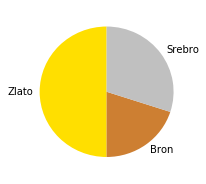

In [12]:
# Prikazi primer slike in reprodukcija ; št medalj glede na državo
# Nariši piecharte za vsako državo posebej


# Denarni sklad; $25,000 za zlato, $15,000 za srebrno, $10,000 za bronasto medaljo 
total      = 25 + 15 + 10
gold_ratio = 25 / total
silv_ratio = 15 / total
bron_ratio = 10 / total

# Medal colors
gold_color = "#FFDF00"
silv_color = "#C0C0C0"
bron_color = "#CD7F32"

plt.figure(figsize=(3, 3))
plt.pie((gold_ratio, bron_ratio, silv_ratio), labels=("Zlato", "Bron", "Srebro",), 
        colors=(gold_color, bron_color, silv_color), startangle=90)
plt.show()

### Spol udeležencev
Prikažimo še bolj informativno porazdelitev, ki pokaže število moških in ženskih udeležencev iger za posamezno državo. Najprej pripravimo podatke ...

In [13]:
countries = data.domain["country"].values
gender_by_country = dict()

for country in countries:
    
    # Filter by countries
    filt        = SameValue(data.domain["country"], country)
    data_subset = filt(data)
    
    # Filter males
    filt        = SameValue(data.domain["gender"], "Male")
    data_subset_male = filt(data_subset)
    
    # Filter females
    filt        = SameValue(data.domain["gender"], "Female")
    data_subset_female = filt(data_subset)
    
    # Store gender counts
    gender_by_country[country] = {"Male": len(data_subset_male),
                                 "Female": len(data_subset_female)}

NameError: name 'data' is not defined

... nato pa narišemo sliko. Uporabimo funkcijo `bar`, saj smo porazdelitev že izračunali sami.

In [14]:
m = [gender_by_country[country]["Male"] for country in countries]
f = [gender_by_country[country]["Female"] for country in countries]
x = range(len(countries))

# Naredi sam/a: Uredi vektorje m, f, x glede na število športnikov posamezne države

plt.figure(figsize=(20, 6))
plt.bar(x, m, color="cyan", align="center")
plt.bar(x, m, bottom=m, color="magenta", align="center")
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)

plt.ylabel("Število športnikov")

# Naredi sam/a: dodaj legendo
plt.show()

NameError: name 'countries' is not defined

<font color="green"><b>Naredi sam/a</b></font>. Uredi zgornji graf tako, da bodo šport urejeni po številu udeležencev in dodaj legendo.

### Najuspešnejše države

<font color="green"><b>Naredi sam/a</b></font>. Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev posameznih medalj po državah. Namig: najprej predpripravi podatke, nato pa nariši diagram. Zgelduj se po prejšnih primerih.
<br/>
<img src="slike/medalje.png"></img>

In [15]:
# Priprava podatkov
# Poisci indekse
gold_inx = data.domain.index("gold_medals")
silv_inx = data.domain.index("silver_medals")
bron_inx = data.domain.index("bronze_medals")

# Pripravi podatke ; shrani st. medalj za vsako drzavo in sport
countries = data.domain["country"].values


# Prestej medalje
medals_by_country = dict()
for country in countries:
    medals_by_country[country] = dict()
    filt        = SameValue(data.domain["country"], country)
    data_subset = filt(data) 
    medals_by_country[country] = {
        "gold":   data_subset.X[:, gold_inx].sum(),
        "silver": data_subset.X[:, silv_inx].sum(),
        "bronze": data_subset.X[:, bron_inx].sum(),
}                    

NameError: name 'data' is not defined

In [16]:
# Narisi sliko

Rešitev

In [17]:
countries = filter(lambda c: sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]), countries)
countries = sorted(countries, key=lambda c: -sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]))
gx = array([medals_by_country[c]["gold"] for c in countries])
sx = array([medals_by_country[c]["silver"] for c in countries])
bx = array([medals_by_country[c]["bronze"] for c in countries])
x = range(len(countries))

plt.figure(figsize=(10, 6))
plt.bar(x, gx, align="center", color=gold_color, label="Zlato")
plt.bar(x, sx, align="center", bottom=gx, color=silv_color, label="Srebor")
plt.bar(x, bx, align="center", bottom=gx+sx, color=bron_color, label="Bron")
plt.xlim(-0.5, len(x)-0.5)
plt.legend()
plt.xticks(x)
plt.yticks(range(0, 25, 2))
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel("St. medalj")
plt.show()

NameError: name 'countries' is not defined

### Sestavljene vizualizacije

Namen dobre vizualizacije je prava mera podatkov na danem prostoru. Ta naj ne bo prevelika, vseeno pa želimo čimbolje izkoristiti prostor. Oglejmo si primer risanja <b>porazdelitev podatkov o višini in teži glede na posamezno športno panogo</b>.  

<font color="green"><b>Naredi sam/a</b></font>. Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev posameznih medalj po državah. Za vsakega igralca narišimo točko, kjer bo velikost točke premo sorazmerna s težo športnika. Osi x in y bomo izkoristili tako, da na osi x narišemo višino, na osi y pa bo posamezna športna panoga. 
<br/>

<img src="slike/višina.png"></img>

In [18]:
# Priprava podatkov
# Teza in visina glede na sport; sport se nahaja v 8 stolpcu
sports = data.domain["sport"].values
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    filt = SameValue(data.domain["sport"], sport)
    data_subset = filt(data)
    
    w = data_subset[:, data.domain.index("weight")].X.ravel()
    h = data_subset[:, data.domain.index("height")].X.ravel()
    a = data_subset[:, data.domain.index("age")].X.ravel()
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

NameError: name 'data' is not defined

In [19]:
# Narisi sliko

<font color="green"><b>Naredi sam/a</b></font>. Uredi zgornji graf tako, da bodo šport urejeni po povprečni višini. Poizkusi tudi spreminjati količine na posameznih oseh (x, y, velikost pike).

Rešitev

In [20]:
plt.figure(figsize=(6, 8))

for si, sport in enumerate(sports):
    
    xs = heights_by_sport[sport]    # x os
    ys = [si for x in xs]           # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sports)
        
plt.xlabel("Višina (cm)")
plt.ylabel("Šport")
plt.show()

NameError: name 'sports' is not defined